In [1]:
# Imports
# Data handling
import pandas as pd
# Mathematical operations
import numpy as np
import math
# Visulization 
import matplotlib.pyplot as plt
# To set random operation 
import random

In [2]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Ads_CTR_Optimisation.csv')

In [3]:
# Top 5 rows
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
# Shape of the data
data.shape

(10000, 10)

#**Prepare the experiment**

In [5]:
# Set the observation to iterate over
observations = 10000

# Set machines that to be iterated 
machines = 10

# To save which machine is selected
machine_selected = []

# Store rewards
rewards = [0] * machines

# Store penalties
penalties = [0] * machines

# Store cummulative sum of rewards
total_reward = 0

#**Run Thompson Sampling**

In [6]:
for n in range(0, observations):
  bandit = 0
  beta_max = 0
  for i in range(0, machines):
    beta_d = random.betavariate(rewards[i] + 1, penalties[i] + 1)
    if beta_d > beta_max:
      beta_max = beta_d
      bandit = i  
      machine_selected.append(bandit)
      reward = data.values[n, bandit]
      # store the results 
      if reward == 1:
        rewards[bandit] = rewards[bandit] + 1
      else:
        penalties[bandit] = penalties[bandit] + 1
      total_reward = total_reward + reward

#**Visualize the result**

In [7]:
print("Rewards By Machine = ", rewards)
print("\nTotal Rewards = ", total_reward)
print("\nMachine Selected At Each Round By Thompson Sampling : \n", machine_selected)

Rewards By Machine =  [1703, 70, 5, 108, 2678, 0, 13, 86, 1, 1]

Total Rewards =  4665

Machine Selected At Each Round By Thompson Sampling : 
 [0, 1, 2, 0, 1, 9, 0, 3, 8, 0, 4, 5, 0, 2, 4, 6, 0, 3, 4, 0, 2, 4, 5, 7, 0, 1, 2, 3, 0, 1, 0, 2, 0, 1, 2, 6, 8, 0, 1, 6, 0, 3, 8, 9, 0, 2, 3, 5, 0, 3, 8, 0, 1, 4, 7, 0, 1, 3, 4, 6, 7, 0, 4, 7, 0, 1, 0, 2, 3, 0, 3, 4, 7, 0, 2, 4, 6, 7, 0, 6, 0, 1, 3, 0, 4, 0, 7, 0, 4, 7, 0, 3, 4, 7, 9, 0, 3, 4, 8, 0, 2, 0, 2, 5, 7, 0, 3, 7, 8, 0, 2, 4, 5, 7, 0, 1, 7, 0, 3, 4, 0, 4, 9, 0, 2, 3, 7, 9, 0, 2, 3, 5, 9, 0, 1, 3, 4, 5, 6, 0, 2, 3, 4, 8, 0, 1, 7, 0, 2, 3, 0, 3, 8, 0, 1, 3, 4, 0, 3, 4, 0, 1, 2, 3, 4, 7, 0, 3, 4, 0, 4, 0, 1, 4, 0, 1, 3, 0, 1, 2, 3, 0, 2, 4, 0, 1, 7, 0, 1, 3, 4, 7, 0, 1, 5, 0, 3, 4, 7, 0, 1, 3, 0, 1, 2, 4, 0, 1, 2, 4, 0, 1, 4, 0, 1, 2, 4, 0, 4, 9, 0, 1, 2, 4, 0, 1, 3, 4, 0, 1, 4, 0, 2, 4, 9, 0, 1, 4, 0, 2, 3, 4, 0, 3, 4, 0, 3, 4, 0, 1, 2, 4, 0, 3, 7, 0, 4, 0, 4, 7, 0, 3, 4, 6, 0, 1, 2, 4, 0, 1, 2, 4, 0, 3, 4, 0, 1, 4, 6, 0, 1, 4, 0, 1, 4, 

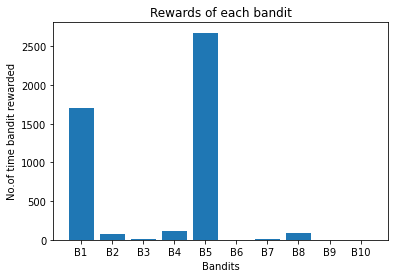

In [8]:
# Reward generated by each bandit
plt.bar(['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10'],rewards)
plt.title('Rewards of each bandit')
plt.xlabel('Bandits')
plt.ylabel('No.of time bandit rewarded')
plt.show()

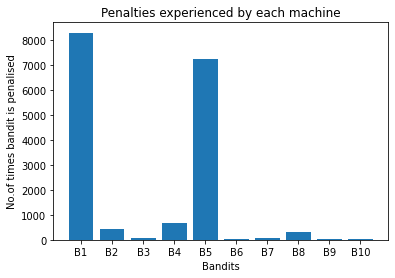

In [9]:
# Penalties experinced by each bandit
plt.bar(['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10'],penalties)
plt.title('Penalties experienced by each machine')
plt.xlabel('Bandits')
plt.ylabel('No.of times bandit is penalised')
plt.show()

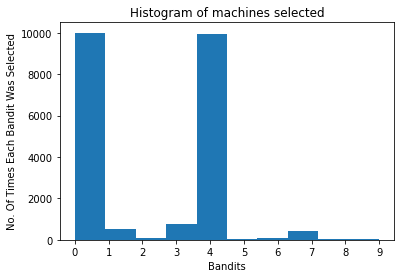

In [10]:
#Visualizing the Number Of Times Each Machine Was Selected
plt.hist(machine_selected)
plt.title('Histogram of machines selected')
plt.xlabel('Bandits')
plt.xticks(range(0, 10))
plt.ylabel('No. Of Times Each Bandit Was Selected')
plt.show()